## Gradient Boosting

- Gradient Boosting is a very similar idea to AdaBoost, where weak learners are created in series in order to produce a strong ensemble model
- Gradient Boosting makes use of the residual error for learning.

### Gradient Boosting vs AdaBoost
- Larger trees allowed in Gradient Boosting.
- Learing rate coefficient same for all weak learners.
- Gradual series learning is based on training on the residuals of the previous model.

### Gradient Boositng Process
- Create initial model: f0
- Train another model on error
   - e = y - f0
- Create new prediction
   - F1 = f0 + nf1
- Repeat as needed
   - Fm = fm-1 + nfm  

### Gradient Boosting Intuituin
- We optimize the series of trees by learning on the residuals, forcing subsequent trees to attempt to correct for the error in the previous trees.
- The trade-off is training time.
- A learning rate is between 0-1, which means a very low value would mean each subsequent tree has little 'say', meaning more trees need to be created, causing a longer computational training time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('./Dataset/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X, drop_first=True)

In [4]:
y = df['class']

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {'n_estimators': [50, 100],
             'learning_rate': [0.1, 0.05, 0.2],
             'max_depth': [3, 4, 5]}

In [15]:
gb_model = GradientBoostingClassifier()

In [16]:
grid = GridSearchCV(gb_model, param_grid)

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
predictions = grid.predict(X_test)
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [20]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [22]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 6.91202199e-17, 7.06478475e-18, 0.00000000e+00,
       8.41688453e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 1.97884410e-17, 1.00028219e-17,
       1.76007995e-17, 0.00000000e+00, 0.00000000e+00, 1.72859408e-06,
       2.31055039e-03, 5.40051814e-02, 6.24175887e-04, 1.75233292e-02,
       1.82499853e-02, 2.04576302e-05, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28199024e-02,
       1.11296052e-02, 0.00000000e+00, 3.14981808e-16, 0.00000000e+00,
       1.75431120e-17, 1.09352725e-17, 0.00000000e+00, 1.43992475e-17,
       3.41897077e-17, 0.00000000e+00, 6.85806525e-18, 0.00000000e+00,
       1.18312069e-05, 0.00000000e+00, 1.35990114e-01, 4.69032068e-03,
       2.04354273e-02, 1.61151852e-03, 6.12113083e-06, 7.07193180e-06,
       1.83319493e-05, 2.54090956e-03, 4.61879691e-02, 1.33720216e-04,
       0.00000000e+00, 0.00000000e+00, 8.27598823e-06, 0.00000000e+00,
      

In [23]:
feat_import = grid.best_estimator_.feature_importances_

In [24]:
imp_feat = pd.DataFrame(index = X.columns,
                       data=feat_import,
                       columns=['Importance'])

In [25]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,6.912022e-17
cap-shape_k,7.064785e-18
cap-shape_s,0.000000e+00
cap-shape_x,8.416885e-17
...,...
habitat_l,0.000000e+00
habitat_m,9.214311e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [26]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [27]:
imp_feat

,Importance
cap-surface_g,0.001047
cap-color_y,0.002311
bruises_t,0.054005
odor_c,0.000624
odor_f,0.017523
odor_l,0.018250
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012820
gill-size_n,0.011130


In [29]:
imp_feat = imp_feat.sort_values('Importance')

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'ring-number_t'),
  Text(1, 0, 'stalk-color-below-ring_w'),
  Text(2, 0, 'odor_c'),
  Text(3, 0, 'cap-surface_g'),
  Text(4, 0, 'ring-type_p'),
  Text(5, 0, 'population_c'),
  Text(6, 0, 'stalk-surface-above-ring_k'),
  Text(7, 0, 'cap-color_y'),
  Text(8, 0, 'stalk-surface-below-ring_s'),
  Text(9, 0, 'stalk-color-below-ring_y'),
  Text(10, 0, 'spore-print-color_h'),
  Text(11, 0, 'odor_p'),
  Text(12, 0, 'spore-print-color_u'),
  Text(13, 0, 'stalk-root_e'),
  Text(14, 0, 'ring-type_n'),
  Text(15, 0, 'gill-size_n'),
  Text(16, 0, 'gill-spacing_w'),
  Text(17, 0, 'odor_f'),
  Text(18, 0, 'odor_l'),
  Text(19, 0, 'stalk-root_r'),
  Text(20, 0, 'spore-print-color_r'),
  Text(21, 0, 'stalk-surface-below-ring_y'),
  Text(22, 0, 'bruises_t'),
  Text(23, 0, 'stalk-root_c'),
  Text(24, 0, 'odor_n')])

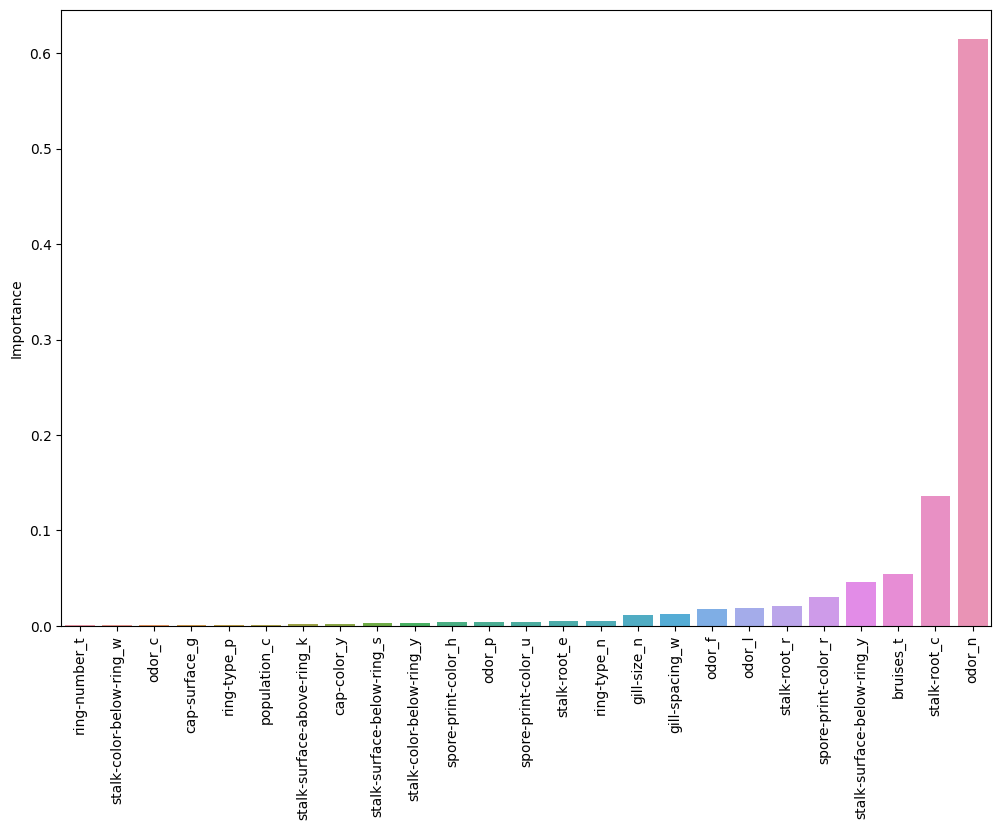

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(data=imp_feat,
           x = imp_feat.index,
           y = 'Importance')
plt.xticks(rotation=90)